In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-budget-and-sales-csv/Advertising Budget and Sales.csv
/kaggle/input/advert-csv/Advertising Budget and Sales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('/kaggle/input/advert-csv/Advertising Budget and Sales.csv')
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
x=np.array(df.iloc[:,0:3])
y=df.iloc[:,3]

In [6]:
type(x)

numpy.ndarray

In [7]:
x.shape

(200, 3)

RESHAPE TO BE DONE ONLY IF THERE IS ONE FEATURE IN X

from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [10]:
y_train.shape

(160,)

In [11]:
model=LinearRegression()

In [12]:
type(x_train)

numpy.ndarray

In [13]:
type(x_train)


numpy.ndarray

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(x_test)
y_pred

array([12.61642732, 12.92004597, 12.08471384, 16.82199977, 24.05507461,
       14.27401262, 20.38340381, 12.18421129, 10.09174637,  8.66655408,
       19.95514125, 19.30787454, 12.14730531, 15.21977508, 17.23740592,
        9.7598278 , 14.41000251, 16.51146169,  8.92695588, 16.02464885,
       10.05186805, 19.4154987 , 15.12151244, 21.16976203, 13.66330888,
       12.21606824, 10.2390723 , 18.17447189,  8.14300866, 10.98457653,
       18.84836683,  9.0123122 , 17.14149406, 17.81595324, 17.37571806,
       11.30634219, 14.48268811, 21.22881792, 12.1818627 , 23.36759687])

In [16]:
data=pd.DataFrame({'actual':y_test,'predicted':y_pred})
data

,actual,predicted
96,11.7,12.616427
5,7.2,12.920046
116,12.2,12.084714
35,12.8,16.822000
183,26.2,24.055075
160,14.4,14.274013
54,20.2,20.383404
134,10.8,12.184211
90,11.2,10.091746
191,9.9,8.666554


In [17]:
r2_score(y_test,y_pred)

0.7982652261831081

In [18]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

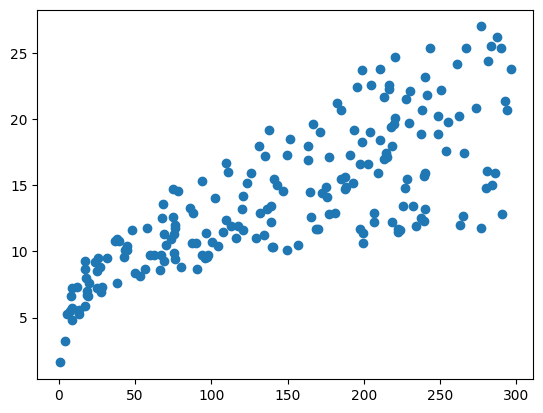

In [19]:
plt.scatter(df.iloc[:,0],df.iloc[:,3])

In [20]:
y_pred.shape

(40,)

In [21]:
y_test.shape

(40,)

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
model1=DecisionTreeRegressor()

In [24]:
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [25]:
pred=model1.predict(x_test)
pred

array([11.4,  6.6, 12.9, 12.7, 25.5, 12.9, 19.8, 10.4, 10.5,  9.7, 19.6,
       19.6, 12.6, 17.3, 14.6, 11.5, 14.9, 14.7,  4.8, 14.6, 11. , 20.2,
       14.9, 24.4, 12.5,  9.3, 11.3, 21.2,  6.6,  6.6, 15.9,  8.6, 17. ,
       15.9, 17. ,  9.5, 12.5, 23.2, 12.9, 24.7])

In [26]:
r2_score(y_test,pred)

0.9379597620714581

df1=pd.DataFrame({'actual':y_test,'predicted':pred})
df1.head(10)

now we will classify the sales data as low,medium and high and run a classification model like logistic regression on the same dataset

In [27]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [28]:
    list=[]
    for i in df.iloc[:,3]:
    
        if i >11 and i<20:
            i=1
            list.append(i)
        elif i>20:
            i=2
            list.append(i)
        else:
            i=0
            list.append(i)
    print(list)   

[2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1]


In [29]:
df['Sales_performance']=list

In [30]:
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),Sales_performance
0,230.1,37.8,69.2,22.1,2
1,44.5,39.3,45.1,10.4,0
2,17.2,45.9,69.3,9.3,0
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,0
196,94.2,4.9,8.1,9.7,0
197,177.0,9.3,6.4,12.8,1
198,283.6,42.0,66.2,25.5,2


In [31]:
x=df.iloc[:,[0,1,2]]
y=df.iloc[:,4]

In [32]:
y

0      2
1      0
2      0
3      1
4      1
      ..
195    0
196    0
197    1
198    2
199    1
Name: Sales_performance, Length: 200, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model2=LogisticRegression()

In [36]:
x_train.shape

(160, 3)

In [37]:
y_train.shape

(160,)

In [38]:
model2.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_predict=model2.predict(x_test)
y_predict

array([2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0])

In [40]:
y_test=np.array(y_test)
y_test

array([2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0])

In [41]:
data1=pd.DataFrame({'actual':y_test,'predicted':y_predict})\
data1

SyntaxError: invalid syntax (2746308676.py, line 2)

In [ ]:
sales=pd.DataFrame({'actual':y_test,'predicted':y_predict})
sales

In [ ]:
model2.predict_proba(x_test)

print(classification_report(y_test,y_predict))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
NOW LET US USE A DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4=DecisionTreeClassifier()

In [ ]:
model4.fit(x_train,y_train)

In [ ]:
pr=model4.predict(x_test)
pr

In [ ]:
print(classification_report(y_test,pr))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,pr)

In [ ]:

y=model4.predict_proba(x_test)
y[1]